# Density differences between runs with and without tides, for GC+FES as well as GC+FES30

*Author: Miriam Sterl*

We plot the differences in average particle density between runs with and without tides, for the GC+FES as well as the GC+FES30 run, for the initial and final years of the simulations.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker

In [2]:
yearstart = [0, 183, 365, 548, 731, 913, 1096, 1279, 1461, 1644, 1826, 2009, 2192, 2374] 
# the index of the time data where each year starts, beginning with 2002, ending with 2015 (note: there is just 1 date in 2015)

In [3]:
binsLon = np.arange(-180, 181, 1) # the bins in longitudinal direction
binsLat = np.arange(-80, 81, 1) # the bins in latitudinal direction

In [ ]:
calcDens_GC = np.load('/science/projects/oceanparcels/output_data/data_Miriam/DensityGC')
calcDens_GCFES = np.load('/science/projects/oceanparcels/output_data/data_Miriam/DensityGCFES')
calcDens_GCFES30 = np.load('/science/projects/oceanparcels/output_data/data_Miriam/DensityGCFES30')

In [4]:
# We compute the average differences in densities (with tides - without tides) in the initial and final years of the simulations

densDiff1 = (np.mean(calcDens_GCFES[yearstart[0]:yearstart[1],:,:] - calcDens_GC[yearstart[0]:yearstart[1],:,:],axis=0))
densDiff2 = (np.mean(calcDens_GCFES[yearstart[12]:yearstart[13],:,:] - calcDens_GC[yearstart[12]:yearstart[13],:,:],axis=0))
densDiff3 = (np.mean(calcDens_GCFES30[yearstart[0]:yearstart[1],:,:] - calcDens_GC[yearstart[0]:yearstart[1],:,:],axis=0))
densDiff4 = (np.mean(calcDens_GCFES30[yearstart[12]:yearstart[13],:,:] - calcDens_GC[yearstart[12]:yearstart[13],:,:],axis=0))

In [16]:
def DensityPlot(lon, lat, dens, fig, ax, v, year):
    """
    Function that plots the average density in number of particles per km^2 on the globe for a certain year
    """
    Lat, Lon = np.meshgrid(lat, lon)
    maskedDens = np.ma.masked_where(dens==0, dens) # mask land points
    density = ax.pcolormesh(Lon, Lat, maskedDens/1e-4, cmap = 'seismic', vmin=-v, vmax=v)
    
    ax.coastlines()
    ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black', facecolor=(0.6,0.6,0.6))
    ax.set_xticks([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180], crs=ccrs.PlateCarree())
    ax.set_xticklabels([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180], fontsize=17)
    ax.set_yticks([-90, -60, - 30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    ax.set_yticklabels([-90, -60, - 30, 0, 30, 60, 90], fontsize=17)
    lon_formatter = cticker.LongitudeFormatter()
    lat_formatter = cticker.LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.grid(linewidth=2, color='black', alpha=0.25, linestyle=':')
    if year==1:
        ax.set_title('(a) Tides for 13 years, initial year of simulation', fontsize=19,fontweight='bold')  
    elif year==2:
        ax.set_title('(b) Tides for 13 years, final year of simulation', fontsize=19,fontweight='bold') 
    elif year==3:
        ax.set_title('(c) Tides for 30 days, initial year of simulation', fontsize=19,fontweight='bold') 
    else:
        ax.set_title('(d) Tides for 30 days, final year of simulation', fontsize=19,fontweight='bold') 
    cbar = fig.colorbar(density, ax=ax, shrink=0.8, extend='both', pad=0.02)
    cbar.set_label("Plastic Density Difference ($10^{-4}$ particles/km$^{2}$)", rotation=90, fontsize=15)
    cbar.ax.tick_params(labelsize=15)
 
    return density

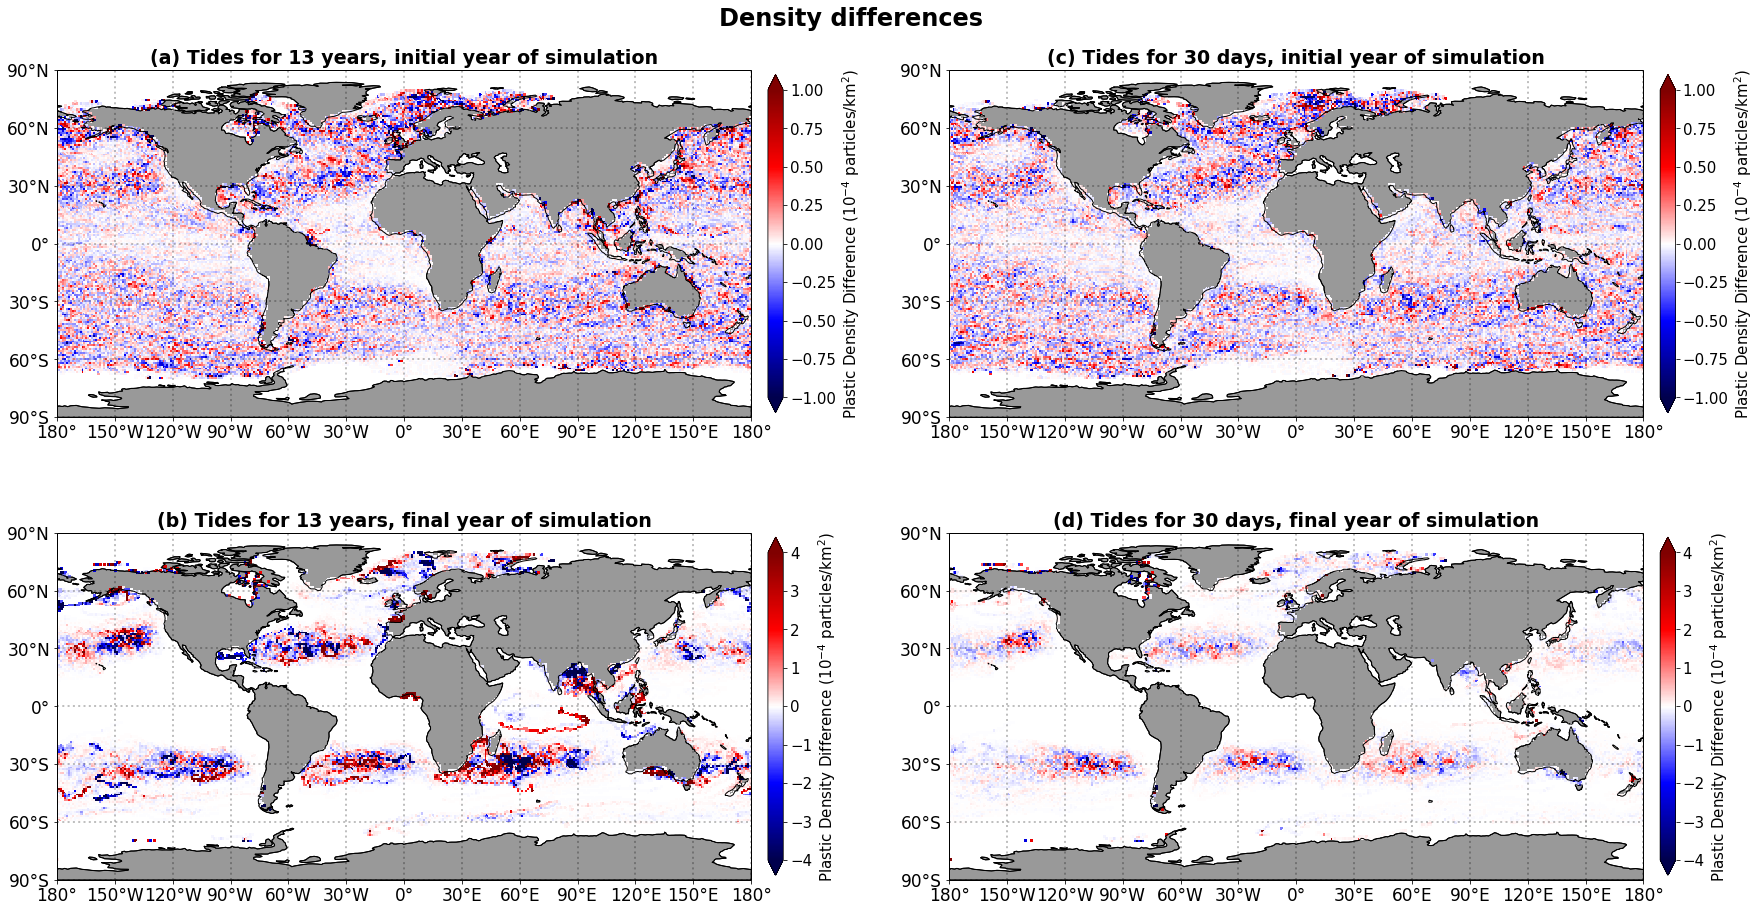

In [18]:
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(25,13), subplot_kw={'projection': ccrs.PlateCarree()})
density1 = DensityPlot(binsLon, binsLat, densDiff1, fig, ax=ax1, v=1, year=1)
density2 = DensityPlot(binsLon, binsLat, densDiff2, fig, ax=ax2, v=4, year=2)
density3 = DensityPlot(binsLon, binsLat, densDiff3, fig, ax=ax3, v=1, year=3)
density4 = DensityPlot(binsLon, binsLat, densDiff4, fig, ax=ax4, v=4, year=4)
fig.suptitle('Density differences', x=0.475,y=1, fontsize=24,fontweight='bold')
plt.tight_layout()
#plt.savefig('DensityDifferences', bbox_inches='tight')